# Earthquake Data in North America Between 10/08/16  and 10/15/2016

This notebook computes basic analytics on earthquake data provided by http://earthquake.usgs.gov/earthquakes/search/.

Date range for data:
Starting: 2016-10-08 00:00:00
Ending: 2016-10-15 23:59:59

Location:
[8.407, 78.207] Latitude
[-172.266, -54.492] Longitude

Minimum magnitude: 2.5


## Analytics performed
1. [Set-Up and Load Data](#data_set)

2. [Query Data](#data)

3. [Visual Representation of Queries](#visual)

4. [Example: Find the places with the most Earthquakes](#places)


<a id="data_set"></a> 
## 1. Set-Up and Load Data

The data is uploaded in a .csv format (Earthquakesquery.csv, in this case) and loaded into dataframe object. Examples below should you how to view your data within the notebook. 

In [1]:
import requests, StringIO, pandas as pd, json, re

In [2]:
# function provided by example notebook "Analyze Precipitation Data" as a way to access your data with your credentials 
def get_file_content(credentials):
    """For given credentials, this functions returns a StringIO object containing the file content."""
    
    url1 = ''.join([credentials['auth_url'], '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
           'password': {'user': {'name': credentials['username'],'domain': {'id': credentials['domain_id']},
           'password': credentials['password']}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()    
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                if(e2['interface']=='public'and e2['region']==credentials['region']):
                    url2 = ''.join([e2['url'],'/', credentials['container'], '/', credentials['filename']])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO.StringIO(resp2.content)

In [3]:
# credentials that let you access your Spark instance
credentials_1 = {
  'auth_url':'https://identity.open.softlayer.com',
  'project':'object_storage_bc051acd_c1d9_4a5a_980e_e65cc0bf52e0',
  'project_id':'53601bbabe47480ba27d8e3a19ca4d8c',
  'region':'dallas',
  'user_id':'156b02f442054495ba24a758665f9009',
  'domain_id':'9b6eba4a400e417f8d53c45af6dab225',
  'domain_name':'1139165',
  'username':'admin_97f75959f3a9536e163c966f7788a05bdc836c59',
  'password':"""eDDf[Dh5fhP6l(HK""",
  'filename':'Earthquakequery.csv',
  'container':'notebooks',
  'tenantId':'s584-d33d2b3133b7f9-f4c49f0b0bc7'
}

In [4]:
# load data into a dataframe
content_string = get_file_content(credentials_1)
earthquakes_ds = pd.read_csv(content_string)

In [5]:
# view the first five data rows
earthquakes_ds.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2016-10-15T15:24:25.410Z,32.293335,-115.337334,9.52,2.96,ml,24,117.0,0.128700,0.28,...,2016-10-15T15:35:00.760Z,"15km WSW of Delta, B.C., MX",earthquake,0.44,1.39,0.242,23,automatic,ci,ci
1,2016-10-15T13:19:58.600Z,18.926000,-64.917000,52.00,2.80,Md,4,288.0,0.572227,0.10,...,2016-10-15T17:31:08.469Z,"64km N of Charlotte Amalie, U.S. Virgin Islands",earthquake,6.10,9.00,0.000,3,reviewed,pr,pr
2,2016-10-15T12:29:35.800Z,18.337900,-64.077700,97.00,2.60,Md,4,356.4,0.659363,0.12,...,2016-10-15T17:16:06.164Z,"57km E of Road Town, British Virgin Islands",earthquake,12.00,1.60,0.000,3,reviewed,pr,pr
3,2016-10-15T10:49:47.670Z,38.056332,-119.134331,9.09,2.63,md,41,87.0,0.036540,0.08,...,2016-10-15T17:58:53.555Z,"23km SSE of Bridgeport, California",earthquake,0.25,0.65,0.230,32,automatic,nc,nc
4,2016-10-15T08:14:50.900Z,18.659500,-65.901000,18.00,2.50,Md,11,208.8,0.388072,0.23,...,2016-10-15T15:22:49.055Z,"25km N of Loiza, Puerto Rico",earthquake,0.80,1.00,0.000,6,reviewed,pr,pr


In [6]:
# view the last five data rows
earthquakes_ds.tail()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
124,2016-10-08T03:25:26.990Z,34.688167,-120.276333,3.050,3.40,ml,44,49.0,0.047330,0.18,...,2016-10-12T13:42:21.542Z,"6km S of Los Alamos, CA",earthquake,0.22,0.38,0.109,104,reviewed,ci,ci
125,2016-10-08T02:40:43.200Z,17.876800,-66.648800,6.000,2.60,Md,11,201.6,0.207511,0.20,...,2016-10-08T03:50:54.375Z,"14km SSE of Tallaboa, Puerto Rico",earthquake,0.40,0.60,0.000,7,reviewed,pr,pr
126,2016-10-08T02:16:52.000Z,65.413500,-170.018400,9.400,3.30,ml,NaN,NaN,NaN,0.28,...,2016-10-14T20:25:23.086Z,"49km ESE of Lavrentiya, Russia",earthquake,7.40,2.40,NaN,NaN,reviewed,ak,ak
127,2016-10-08T01:13:16.000Z,53.548400,-167.132600,13.200,3.30,ml,NaN,NaN,NaN,0.54,...,2016-10-14T20:25:02.224Z,"53km SW of Unalaska, Alaska",earthquake,0.70,0.40,NaN,NaN,reviewed,ak,ak
128,2016-10-08T00:21:27.570Z,20.024333,-155.372167,9.033,3.23,ml,26,209.0,0.127600,0.19,...,2016-10-08T17:59:52.710Z,"12km ESE of Honoka'a, Hawaii",earthquake,0.66,0.90,0.139,38,reviewed,hv,hv


<a id="data"></a> 
## 2. Query Data

The two examples below allow you to look at specific parts of your data.
1. Get places with the highest magnitude earthquakes
2. Find all the earthquakes in California

In [7]:
earthquakes_ds = earthquakes_ds.set_index(earthquakes_ds["place"])
earthquakes_ds[["mag"]].sort_values(by = "mag", ascending=False).head(10)

,mag
place,
"70km SW of Higuera de Zaragoza, Mexico",5.1
North Atlantic Ocean,4.9
Off the coast of Oregon,4.8
"4km N of San Jose Acatempa, Guatemala",4.8
"60km NE of Grande Anse, Guadeloupe",4.4
"53km SW of Chontalpa, Mexico",4.4
Off the coast of Oregon,4.1
Off the coast of Oregon,4.1
"90km SW of Wrigley, Canada",4.1


In [8]:
#Query that returns all the earthquakes in California.
earthquakes_ds[earthquakes_ds['place'].str.contains("California")]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
place,,,,,,,,,,,,,,,,,,,,,
"23km SSE of Bridgeport, California",2016-10-15T10:49:47.670Z,38.056332,-119.134331,9.09,2.63,md,41,87,0.03654,0.08,...,2016-10-15T17:58:53.555Z,"23km SSE of Bridgeport, California",earthquake,0.25,0.65,0.230,32,automatic,nc,nc
"5km NW of The Geysers, California",2016-10-15T08:04:41.170Z,38.805332,-122.807663,-0.27,2.70,md,42,45,0.01001,0.05,...,2016-10-15T16:27:03.978Z,"5km NW of The Geysers, California",earthquake,0.13,0.32,0.200,22,automatic,nc,nc
"20km SE of Burney, California",2016-10-15T01:44:26.350Z,40.741833,-121.523003,6.33,2.63,md,15,140,0.08780,0.05,...,2016-10-15T15:20:18.919Z,"20km SE of Burney, California",earthquake,0.55,1.17,0.160,16,automatic,nc,nc
"21km SSE of Ridgemark, California",2016-10-10T08:32:15.360Z,36.638667,-121.259833,9.31,2.67,md,59,55,0.02978,0.08,...,2016-10-15T06:35:30.965Z,"21km SSE of Ridgemark, California",earthquake,0.10,0.24,0.179,123,reviewed,nc,nc
"24km SSE of Mammoth Lakes, California",2016-10-08T21:06:49.020Z,37.452167,-118.839000,7.14,2.64,md,51,82,0.09986,0.06,...,2016-10-13T00:29:03.520Z,"24km SSE of Mammoth Lakes, California",earthquake,0.20,0.91,0.225,49,reviewed,nc,nc


<a id="visual"></a> 
## 3. Visual Representations of Queries 

Here, queries are plotted into different graphs to allow better understanding and visualization of data. The library matplotlib is used extensively. 
1. Below is a bar graph of earthquake magitude by depth of epicenter. 
2. Further down is a line graph of longitude versus latitude of all earthquakes (Note: certain regions on the graph contain clusters)

In [9]:
%matplotlib inline 

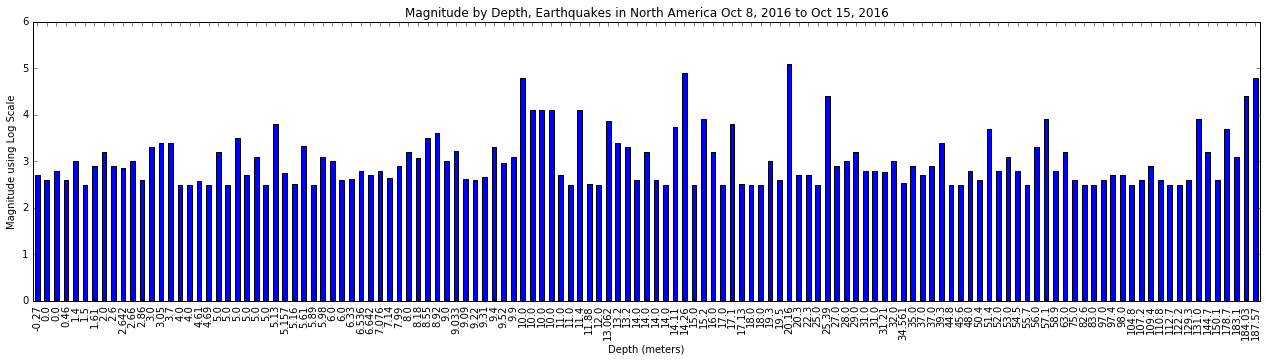

In [10]:
# shows relationship between magnitude of an earthquake and depth of the epicenter
earthquakes_ds = earthquakes_ds.set_index(earthquakes_ds['depth']).sort_values(by = "depth", ascending=True)
mag = earthquakes_ds['mag']
depthplot = mag.plot(kind='bar', figsize=(22,5), title="Magnitude by Depth, Earthquakes in North America Oct 8, 2016 to Oct 15, 2016")
depthplot.set_ylabel("Magnitude using Log Scale")
depthplot.set_xlabel("Depth (meters)");

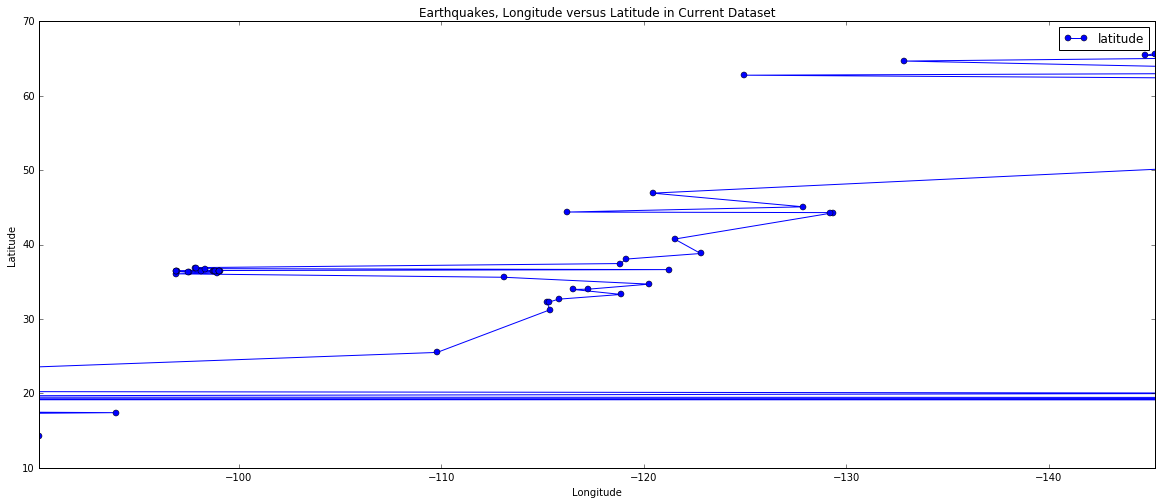

In [17]:
# maps longitude versus latitude to display earthquake clusters by location
earthquakes_ds = earthquakes_ds.set_index(earthquakes_ds['longitude']).sort_values(by = "longitude", ascending=True)
time = earthquakes_ds[["latitude"]].sort_values(by = "latitude", ascending=True)
ax = time.plot(figsize=(20,8), marker='o', linestyle='-', title="Earthquakes, Longitude versus Latitude in Current Dataset")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude");

<a id="places"></a> 
## 4. Example: Find the places with the most Earthquakes

1. Parse data in the places column to determine closest major city to every earthquake.
2. Get a unique list of cities and determine how many earthquakes were in each city.
3. See Pie Chart below - each city's slice is proportional to how many earthquakes occurred during the dataset time frame. 

The winner is Road Town, British Virgin Islands. 
Runner up is Mooreland, Oklahoma.

In [38]:
earthquakes_ds = earthquakes_ds.set_index(earthquakes_ds["place"])
s = pd.Series(earthquakes_ds['place'])
section =s.str.split("of")
series_name = section.str.get(1)
set_series = set(series_name)
set_series = list(set_series)
series_name

place
49km ESE of Lavrentiya, Russia                                           Lavrentiya, Russia
101km E of Nikolski, Alaska                                                Nikolski, Alaska
53km SW of Unalaska, Alaska                                                Unalaska, Alaska
86km SE of Unalaska, Alaska                                                Unalaska, Alaska
48km SE of King Salmon, Alaska                                          King Salmon, Alaska
72km SSE of King Salmon, Alaska                                         King Salmon, Alaska
68km NNW of Ruby, Alaska                                                       Ruby, Alaska
107km W of Larsen Bay, Alaska                                            Larsen Bay, Alaska
8km SW of Pahala, Hawaii                                                     Pahala, Hawaii
12km ESE of Honoka'a, Hawaii                                               Honoka'a, Hawaii
6km SW of Volcano, Hawaii                                                 

In [39]:
from collections import *
series_count = Counter(series_name)
Counter(series_name)

Counter({nan: 1,
         ' Aguas Buenas, Puerto Rico': 1,
         ' Alberto Oviedo Mota, B.C., MX': 2,
         ' Anchor Point, Alaska': 1,
         ' Anchorage, Alaska': 1,
         ' Animas, Puerto Rico': 1,
         ' Bridgeport, California': 1,
         ' Burney, California': 1,
         ' Cantwell, Alaska': 2,
         ' Cascade, Idaho': 1,
         ' Charlotte Amalie, U.S. Virgin Islands': 4,
         ' Cherokee, Oklahoma': 1,
         ' Chirik': 1,
         ' Chontalpa, Mexico': 1,
         ' Circle Hot Springs Station, Alaska': 2,
         ' Cohoe, Alaska': 1,
         ' Cushing, Oklahoma': 1,
         ' Delta Junction, Alaska': 1,
         ' Delta, B.C., MX': 1,
         ' Desert Hot Springs, CA': 1,
         ' Esperanza, Puerto Rico': 3,
         ' Fairview, Oklahoma': 2,
         ' Fishhook, Alaska': 1,
         ' Fritz Creek, Alaska': 1,
         ' Grande Anse, Guadeloupe': 1,
         ' Hatillo, Puerto Rico': 1,
         ' Healy, Alaska': 2,
         ' Helena, Oklahoma':

In [40]:
# group keys and count, likely an better method in Panda lib
import matplotlib.pyplot as plt, numpy as np
names = []
counts = []

for item in series_count.keys():
    names.append(item)
    counts.append(series_count[item])
    


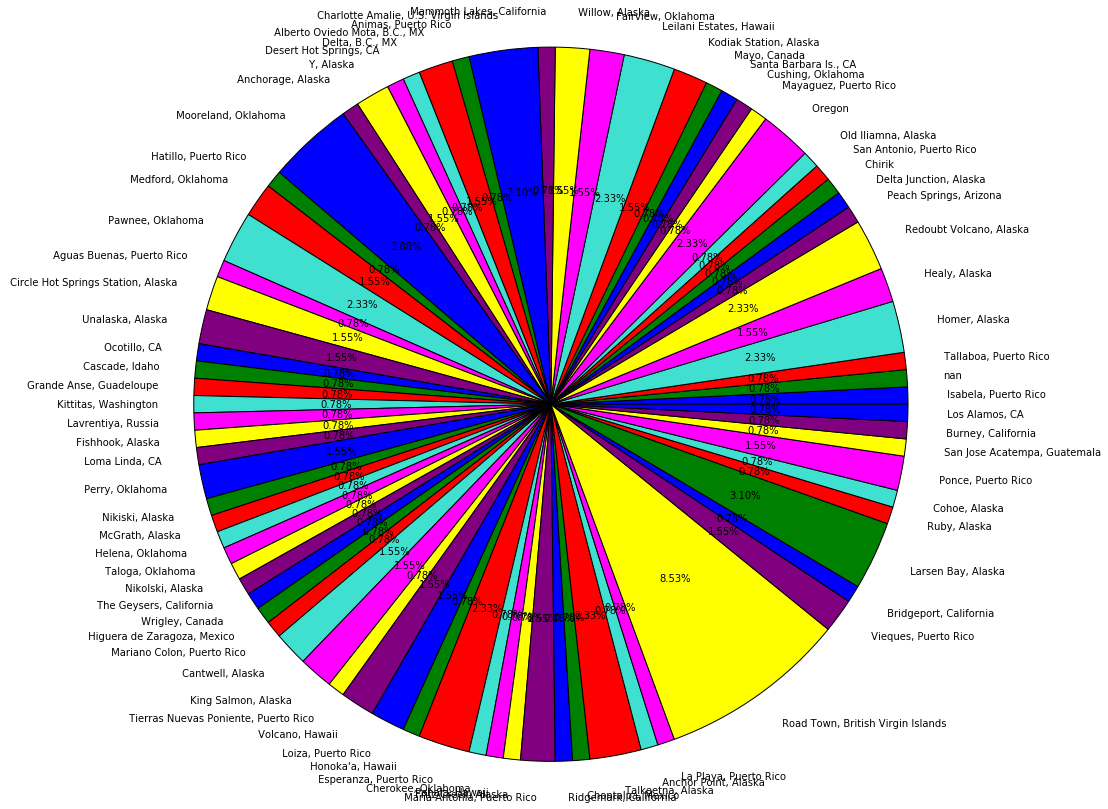

In [49]:
# earthquake pie - Percentage Earthquakes between 10/8/16 to 10/15/16
plt.axis('equal')
plt.pie(
    counts,
    labels= names,
    colors=['blue', 'green', 'red', 'turquoise', 'magenta','yellow', 'purple'],
    autopct="%1.2f%%",
    radius=4);